In [441]:
# Here we are importing all the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE

In [14]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('Housing.csv')

In [5]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [6]:
df.info()
# We can clearly see that there are no null values and all the columns are in right format

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [7]:
# Dataset doesn't contain any null values
df.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [8]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [ ]:
### Here we are visualizing our data to gain some insights from it.

<AxesSubplot:>

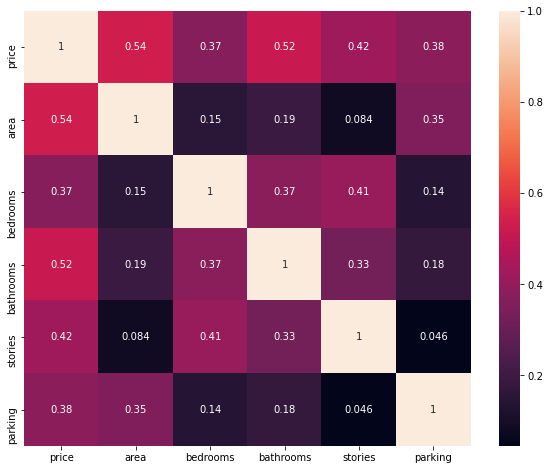

In [19]:
 # Here we are trying to see the correlation b/w all the numerical variables and based on that we can clearly see that area and bathrooms has some coorelation with price
plt.figure(figsize = (10,8))
sns.heatmap(df.corr() , annot = True  )

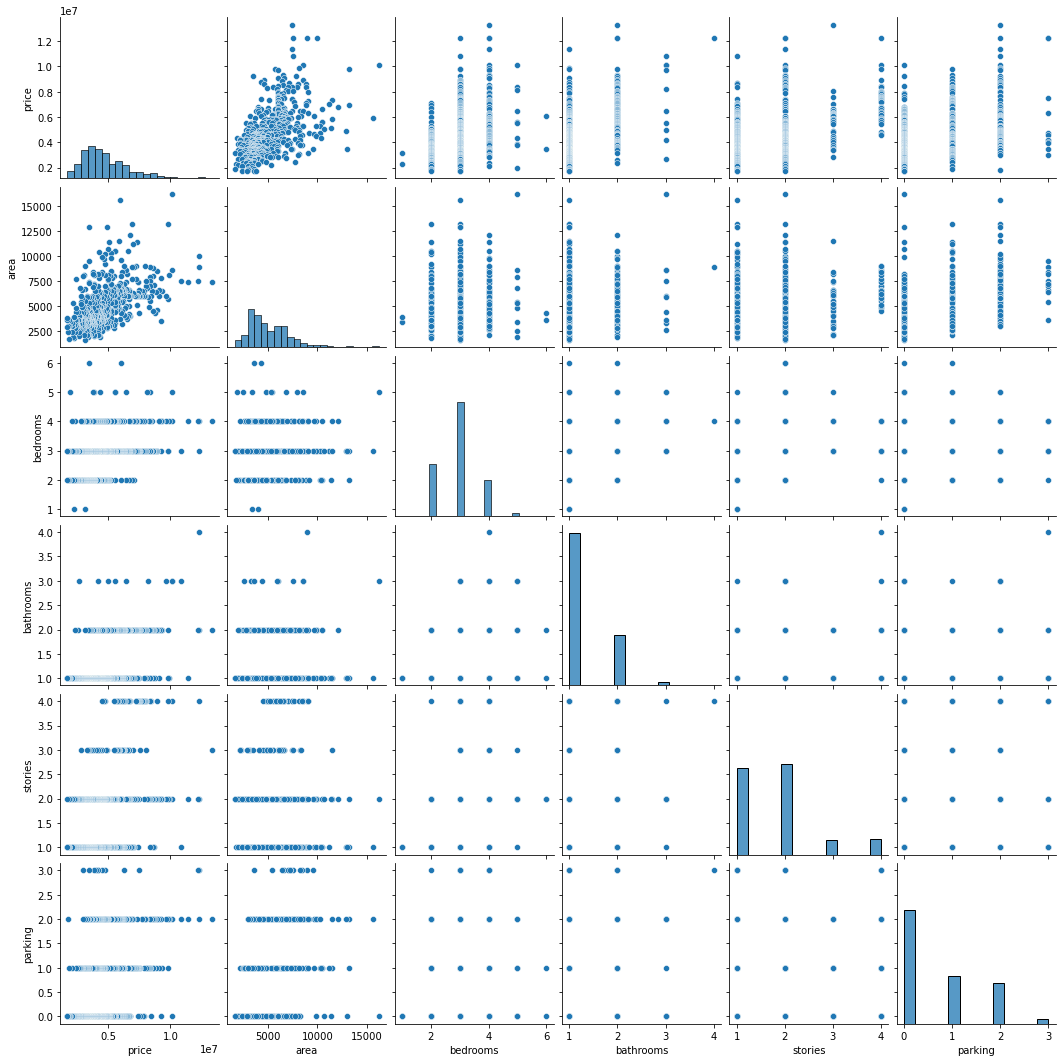

In [13]:
sns.pairplot(df)

In [20]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [23]:
df.select_dtypes(exclude=['int64']).columns.tolist()

['mainroad',
 'guestroom',
 'basement',
 'hotwaterheating',
 'airconditioning',
 'prefarea',
 'furnishingstatus']

In [ ]:
# Let's plot boxplot for categorical variables

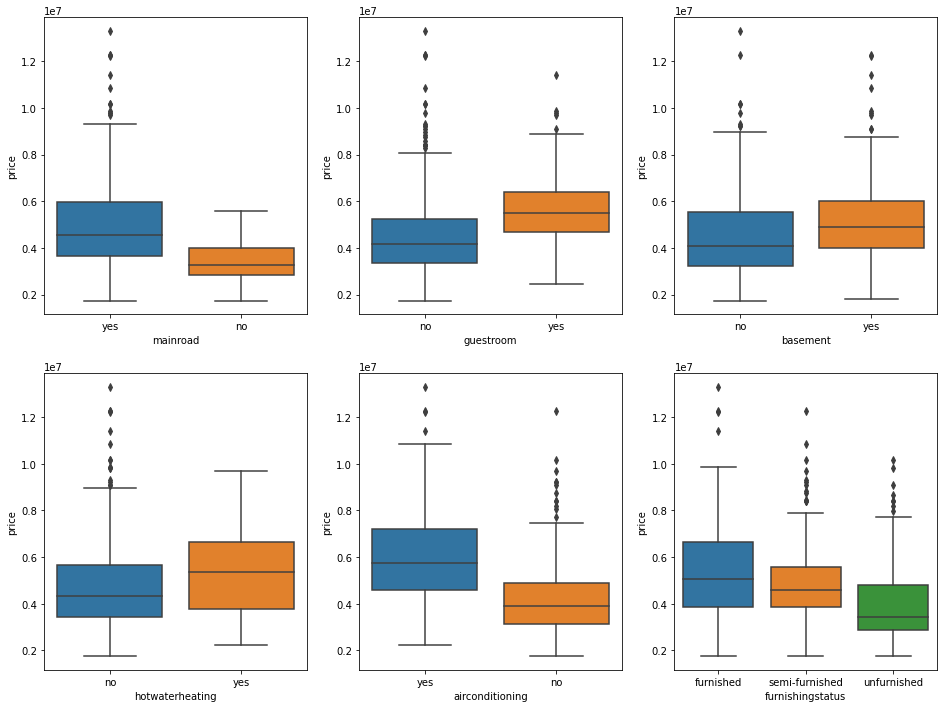

In [36]:
plt.figure(figsize=(16 , 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'mainroad'  , y = 'price' , data = df)
plt.subplot(2,3,2)
sns.boxplot(x = 'guestroom'  , y = 'price' , data = df)
plt.subplot(2,3,3)
sns.boxplot(x = 'basement'  , y = 'price' , data = df)
plt.subplot(2,3,4)
sns.boxplot(x = 'hotwaterheating'  , y = 'price' , data = df)
plt.subplot(2,3,5)
sns.boxplot(x = 'airconditioning'  , y = 'price' , data = df)
plt.subplot(2,3,6)
sns.boxplot(x = 'furnishingstatus'  , y = 'price' , data = df)
plt.show()

<AxesSubplot:xlabel='furnishingstatus', ylabel='price'>

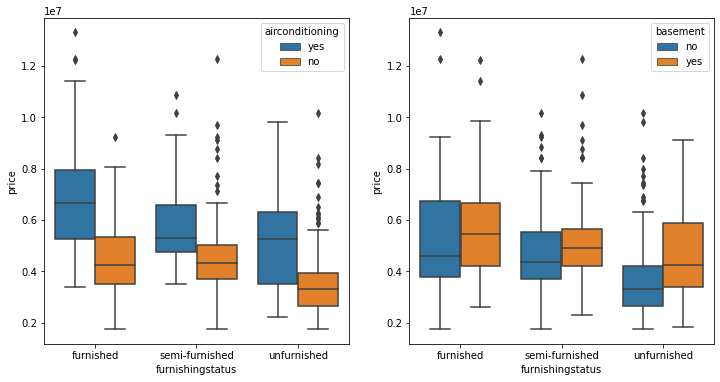

In [46]:
plt.figure(figsize =  (12,6))
plt.subplot(1,2,1)
sns.boxplot(x = 'furnishingstatus' , y = 'price' , hue =  'airconditioning' , data = df )
plt.subplot(1,2,2)
sns.boxplot(x = 'furnishingstatus' , y = 'price' , hue =  'basement' , data = df )

In [51]:
df['hotwaterheating'].replace(('yes' , 'no'),(1,0) , inplace = True )

In [54]:
df['mainroad'].replace(('yes' , 'no'),(1,0) , inplace = True )
df['guestroom'].replace(('yes' , 'no'),(1,0) , inplace = True )
df['basement'].replace(('yes' , 'no'),(1,0) , inplace = True )
df['airconditioning'].replace(('yes' , 'no'),(1,0) , inplace = True )
df['prefarea'].replace(('yes' , 'no'),(1,0) , inplace = True )

In [49]:
df.hotwaterheating.value_counts()

no     520
yes     25
Name: hotwaterheating, dtype: int64

In [475]:
#Converted every categoriccal variables into binary


In [57]:
status = pd.get_dummies(df['furnishingstatus'])

In [60]:
status = pd.get_dummies(df['furnishingstatus'] , drop_first = True)

In [66]:
df = pd.concat([df , status] , axis = 1)

In [70]:
df.drop('furnishingstatus' ,axis =1 , inplace = True)

####  -Now we have converted all the categorical variables into numerical variables 


#### **** Lets's split our dataset into trainig and test set , for training and testing of the model. ****

In [77]:
X = df.drop('price' , axis = 1)

In [81]:
y = df.iloc[: , :1]

In [145]:
# Now we are splitting our dataset into training and testing set.

X_train , X_test , y_train , y_test = train_test_split(X, y ,test_size = 0.2)

In [133]:
Df_train , df_test =  train_test_split(df , test_size = 0.25)

In [134]:
# Here we are creating the instance of MinMaxScaler for scaling the dataset
scaling =MinMaxScaler()

#### Here we are converting every variable on same scale by using MinMaxScaling

In [105]:
cols = ['price' , 'area' , 'bedrooms' , 'bathrooms' ,'stories']

In [135]:
Df_train[cols] = scaling.fit_transform(Df_train[cols])

<AxesSubplot:>

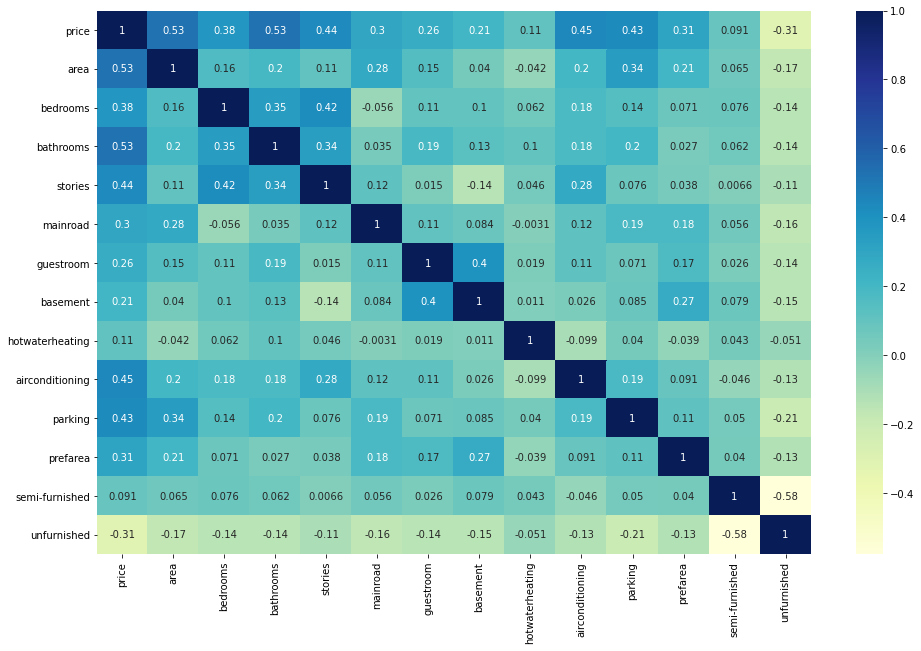

In [136]:
plt.figure(figsize = (16 , 10))
sns.heatmap(Df_train.corr() , annot = True , cmap="YlGnBu")

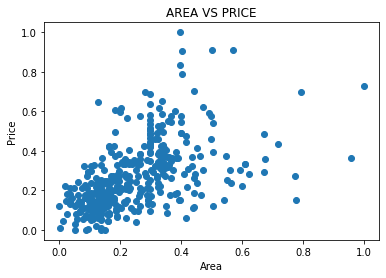

In [137]:
plt.scatter(Df_train.area , Df_train.price )
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('AREA VS PRICE')
plt.show()

In [248]:
test_scale_columns = ['area' , 'bedrooms' , 'bathrooms' , 'stories']

In [139]:
y_train = Df_train.pop('price')

In [140]:
X_train = Df_train

In [252]:
X_test[test_scale_columns] = scaling.fit_transform(X_test[test_scale_columns])

In [257]:
y_test['price'] = scaling.fit_transform(y_test[['price']])

In [163]:
scale_columns = ['area' , 'bedrooms' , 'bathrooms' , 'stories']

In [165]:
X_train[scale_columns] = scaling.fit_transform(X_train[scale_columns])

In [185]:
y_train[['price']] = scaling.fit_transform(y_train[['price']])

### Building model with only one variable

In [202]:
ar = X_train.iloc[: ,  :1]

In [203]:
ar_model = LinearRegression()

In [204]:
ar_model.fit(ar , y_train)

LinearRegression()

In [205]:
ar_model.intercept_

array([0.12284002])

In [207]:
ar_model.coef_

array([[0.56940017]])

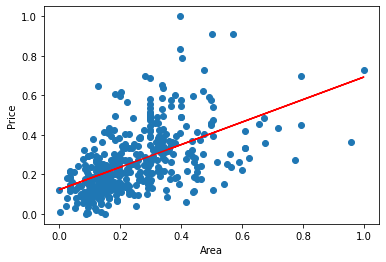

In [211]:
plt.scatter(ar , y_train)
plt.xlabel('Area')
plt.ylabel('Price')
plt.plot(ar , 0.12284002 + 0.56940017*ar , 'r')

In [ ]:
val = X_test.iloc[: , :1]

In [271]:
predicted_val = ar_model.predict(val)

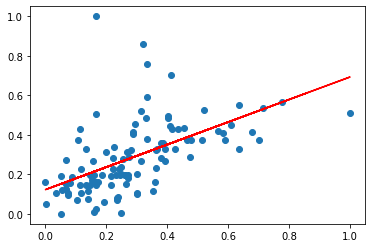

In [279]:
plt.scatter(y_test , val)
plt.plot(val , predicted_val , 'r')

In [281]:
r2_score(y_test , predicted_val)

0.29078719988930346

### Now let's create a model with two variables 

In [225]:
# X_train
two_vars = X_train[['area' , 'bathrooms']]

In [294]:
# X_test
tw_lr_X_test = X_test[['area' , 'bathrooms']]

In [226]:
tw_lr = LinearRegression()

In [227]:
tw_lr.fit(two_vars , y_train)

LinearRegression()

In [229]:
tw_lr.coef_

array([[0.46286037, 0.42412611]])

In [231]:
tw_lr.intercept_

array([0.10724495])

In [286]:
y_test.shape

(109, 1)

In [295]:
tw_lr_predicted = tw_lr.predict(tw_lr_X_test)

In [296]:
r2_score(y_test , tw_lr_predicted)

0.39859889278469873

#### We can clearly see that the value of r2_score increased after adding the variables

In [297]:
mean_squared_error(y_test , tw_lr_predicted)

0.019730285847707682

### No we are making model by adding all the variables

In [302]:
all_vars_model = LinearRegression()

In [304]:
all_vars_model.fit(X_train , y_train)

LinearRegression()

In [306]:
all_vars_model.coef_

array([[ 0.30724392,  0.02042715,  0.26716129,  0.11727522,  0.03380246,
         0.02792867,  0.02519392,  0.07831201,  0.07845263,  0.02207002,
         0.05262112, -0.0119104 , -0.03792399]])

In [307]:
all_vars_model.intercept_

array([0.04199042])

In [309]:
X_test_predicted = all_vars_model.predict(X_test)

In [310]:
r2_score(X_test_predicted , y_test)

0.5000339636790666

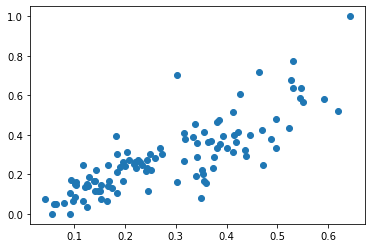

In [311]:
plt.scatter(X_test_predicted , y_test)

## Now we are trying to build our model with statsmodels library.

#### First we build model with all the variabless  , and after looking at the different evaluation metrics we keep dropping the insignificant variables inorder to increase the performance of the model

In [313]:
X_train_lm = sm.add_constant(X_train)

In [320]:
sm_lr = sm.OLS(y_train  , X_train_lm).fit()

In [321]:
sm_lr.params

const              0.041990
area               0.307244
bedrooms           0.020427
bathrooms          0.267161
stories            0.117275
mainroad           0.033802
guestroom          0.027929
basement           0.025194
hotwaterheating    0.078312
airconditioning    0.078453
parking            0.022070
prefarea           0.052621
semi-furnished    -0.011910
unfurnished       -0.037924
dtype: float64

In [326]:
sm_lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                     69.60
Date:                Sat, 25 Dec 2021   Prob (F-statistic):           3.03e-96
Time:                        23:28:10   Log-Likelihood:                 426.79
No. Observations:                 436   AIC:                            -825.6
Df Residuals:                     422   BIC:                            -768.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0420      0.018      2.346      0.019       0.007       0.077
area                0.3072      0.034      9.161      0.000       0.241       0.373
bedrooms            0.0204      0.029      0.699      0.485      -0.037       0.078
bathrooms           0.2672      0.030      8.917      0.000       0.208       0.326
stories             0.1173      0.018      6.411      0.000       0.081       0.153
mainroad            0.0338      0.014      2.436      0.015       0.007       0.061
guestroom           0.0279      0.013      2.160      0.031       0.003       0.053
basement            0.0252      0.011      2.391      0.017       0.004       0.046
hotwaterheating     0.0783      0.021      3.791      0.000       0.038       0.119
airconditioning     0.0785      0.010      7.572      0.000       0.058       0.099
parking             0.0221      0.006      3.947      0.000       0.011       0.033
prefarea            0.0526      0.011      4.699      0.000       0.031       0.075
semi-furnished     -0.0119      0.011     -1.045      0.297      -0.034       0.011
unfurnished        -0.0379      0.012     -3.088      0.002      -0.062      -0.014
==============================================================================
Omnibus:                       89.714   Durbin-Watson:                   1.882
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              252.262
Skew:                           0.974   Prob(JB):                     1.67e-55
Kurtosis:                       6.176   Cond. No.                         14.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [341]:
# We are trying to see the VIF of the variables

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values , i) for i in range(X_train.shape[1])]
vif = round(vif , 2)
vif = vif.sort_values(by = 'VIF' , ascending = False)

In [342]:
vif

,Features,VIF
4,mainroad,5.57
0,area,4.43
1,bedrooms,3.64
3,stories,2.64
11,semi-furnished,2.10
9,parking,2.04
6,basement,1.94
2,bathrooms,1.77
8,airconditioning,1.74
12,unfurnished,1.73


### ****Here we are deleting the row with very high p-values i.e, 'Bedrooms ****

In [347]:
updated_X_train = X_train_lm.drop('bedrooms' , axis = 1)

In [349]:
upd_sm_model = sm.OLS(y_train , updated_X_train).fit()

In [350]:
upd_sm_model.params

const              0.045125
area               0.309058
bathrooms          0.272267
stories            0.121851
mainroad           0.033038
guestroom          0.027655
basement           0.025948
hotwaterheating    0.078380
airconditioning    0.078096
parking            0.022268
prefarea           0.052884
semi-furnished    -0.011858
unfurnished       -0.038097
dtype: float64

In [351]:
upd_sm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     75.45
Date:                Sat, 25 Dec 2021   Prob (F-statistic):           4.34e-97
Time:                        23:47:12   Log-Likelihood:                 426.54
No. Observations:                 436   AIC:                            -827.1
Df Residuals:                     423   BIC:                            -774.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0451      0.017      2.606      0.009       0.011       0.079
area                0.3091      0.033      9.248      0.000       0.243       0.375
bathrooms           0.2723      0.029      9.376      0.000       0.215       0.329
stories             0.1219      0.017      7.138      0.000       0.088       0.155
mainroad            0.0330      0.014      2.389      0.017       0.006       0.060
guestroom           0.0277      0.013      2.141      0.033       0.002       0.053
basement            0.0259      0.010      2.477      0.014       0.005       0.047
hotwaterheating     0.0784      0.021      3.796      0.000       0.038       0.119
airconditioning     0.0781      0.010      7.551      0.000       0.058       0.098
parking             0.0223      0.006      3.990      0.000       0.011       0.033
prefarea            0.0529      0.011      4.728      0.000       0.031       0.075
semi-furnished     -0.0119      0.011     -1.041      0.299      -0.034       0.011
unfurnished        -0.0381      0.012     -3.105      0.002      -0.062      -0.014
==============================================================================
Omnibus:                       91.564   Durbin-Watson:                   1.890
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.216
Skew:                           0.990   Prob(JB):                     3.12e-57
Kurtosis:                       6.225   Cond. No.                         14.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [378]:
Vif = pd.DataFrame()
Vif['Features'] = updated_X_train.columns
Vif['VIF'] = [variance_inflation_factor(updated_X_train.values , i) for i in range(updated_X_train.shape[1])]
Vif = round(vif , 2)
Vif = Vif.sort_values(by = 'VIF' , ascending = False)

In [379]:
Vif

,Features,VIF
4,mainroad,5.57
0,area,4.43
1,bedrooms,3.64
3,stories,2.64
11,semi-furnished,2.10
9,parking,2.04
6,basement,1.94
2,bathrooms,1.77
8,airconditioning,1.74
12,unfurnished,1.73


## Here we are tying to remove the column i.e, 'mainroad'

In [357]:
upd_X_train = updated_X_train.drop('mainroad' , axis = 1)

In [360]:
upd_sm =  sm.OLS(y_train , upd_X_train).fit()

In [362]:
upd_sm.params

const              0.069454
area               0.322055
bathrooms          0.267760
stories            0.125519
guestroom          0.029030
basement           0.025747
hotwaterheating    0.076994
airconditioning    0.077856
parking            0.024037
prefarea           0.056254
semi-furnished    -0.013141
unfurnished       -0.041028
dtype: float64

In [363]:
upd_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     80.89
Date:                Sat, 25 Dec 2021   Prob (F-statistic):           7.77e-97
Time:                        23:59:25   Log-Likelihood:                 423.61
No. Observations:                 436   AIC:                            -823.2
Df Residuals:                     424   BIC:                            -774.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0695      0.014      4.932      0.000       0.042       0.097
area                0.3221      0.033      9.714      0.000       0.257       0.387
bathrooms           0.2678      0.029      9.190      0.000       0.210       0.325
stories             0.1255      0.017      7.342      0.000       0.092       0.159
guestroom           0.0290      0.013      2.237      0.026       0.004       0.055
basement            0.0257      0.011      2.445      0.015       0.005       0.046
hotwaterheating     0.0770      0.021      3.710      0.000       0.036       0.118
airconditioning     0.0779      0.010      7.487      0.000       0.057       0.098
parking             0.0240      0.006      4.322      0.000       0.013       0.035
prefarea            0.0563      0.011      5.042      0.000       0.034       0.078
semi-furnished     -0.0131      0.011     -1.148      0.252      -0.036       0.009
unfurnished        -0.0410      0.012     -3.342      0.001      -0.065      -0.017
==============================================================================
Omnibus:                       87.541   Durbin-Watson:                   1.898
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              242.694
Skew:                           0.956   Prob(JB):                     1.99e-53
Kurtosis:                       6.115   Cond. No.                         12.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [380]:
Vvif = pd.DataFrame()
Vvif['Features'] = upd_X_train.columns
Vvif['VIF'] = [variance_inflation_factor(upd_X_train.values , i) for i in range(upd_X_train.shape[1])]
Vvif = round(Vvif , 2)
Vvif = Vvif.sort_values(by = 'VIF' , ascending = False)

In [381]:
Vvif

,Features,VIF
0,const,10.02
11,unfurnished,1.70
10,semi-furnished,1.61
1,area,1.28
5,basement,1.28
3,stories,1.26
2,bathrooms,1.25
4,guestroom,1.21
7,airconditioning,1.19
8,parking,1.19


## Now we are dropping 'Semi-Furnished' column 

In [384]:
x = upd_X_train.drop('semi-furnished' , axis = 1)

In [387]:
unfur_model = sm.OLS(y_train , x).fit()

In [389]:
unfur_model.params

const              0.059932
area               0.323844
bathrooms          0.268666
stories            0.126261
guestroom          0.029472
basement           0.025465
hotwaterheating    0.076315
airconditioning    0.078979
parking            0.024124
prefarea           0.056786
unfurnished       -0.032490
dtype: float64

In [390]:
unfur_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     88.78
Date:                Sun, 26 Dec 2021   Prob (F-statistic):           1.54e-97
Time:                        00:19:05   Log-Likelihood:                 422.94
No. Observations:                 436   AIC:                            -823.9
Df Residuals:                     425   BIC:                            -779.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0599      0.011      5.264      0.000       0.038       0.082
area                0.3238      0.033      9.775      0.000       0.259       0.389
bathrooms           0.2687      0.029      9.221      0.000       0.211       0.326
stories             0.1263      0.017      7.388      0.000       0.093       0.160
guestroom           0.0295      0.013      2.271      0.024       0.004       0.055
basement            0.0255      0.011      2.418      0.016       0.005       0.046
hotwaterheating     0.0763      0.021      3.678      0.000       0.036       0.117
airconditioning     0.0790      0.010      7.626      0.000       0.059       0.099
parking             0.0241      0.006      4.336      0.000       0.013       0.035
prefarea            0.0568      0.011      5.092      0.000       0.035       0.079
unfurnished        -0.0325      0.010     -3.325      0.001      -0.052      -0.013
==============================================================================
Omnibus:                       88.650   Durbin-Watson:                   1.894
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              250.957
Skew:                           0.960   Prob(JB):                     3.20e-55
Kurtosis:                       6.182   Cond. No.                         12.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [391]:
Vvvif = pd.DataFrame()
Vvvif['Features'] = x.columns
Vvvif['VIF'] = [variance_inflation_factor(x.values , i) for i in range(x.shape[1])]
Vvvif = round(Vvif , 2)
Vvvif = Vvif.sort_values(by = 'VIF' , ascending = False)

In [393]:
Vvvif

,Features,VIF
0,const,10.02
11,unfurnished,1.70
10,semi-furnished,1.61
1,area,1.28
5,basement,1.28
3,stories,1.26
2,bathrooms,1.25
4,guestroom,1.21
7,airconditioning,1.19
8,parking,1.19


#### Now we are good to go with this model , because all the varibles have very small p-value and the value of VIF is also less than 5

In [394]:
unfur_model

In [397]:
X_test = sm.add_constant(X_test)

In [408]:
predicted_y = unfur_model.predict(X_test)

In [405]:
x.shape

(436, 11)

In [406]:
X_test = X_test.drop(['bedrooms' , 'mainroad' , 'semi-furnished' ] , axis = 1)

<AxesSubplot:>

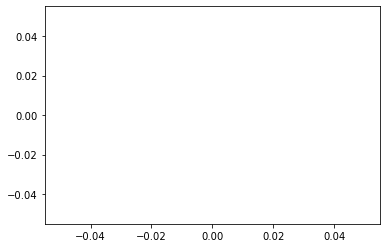

In [435]:
sns.distplot(y_test - predicted_y)

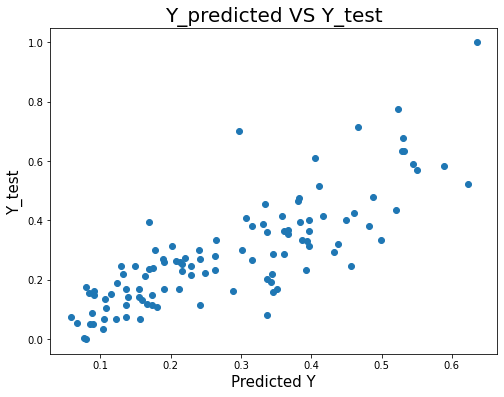

In [419]:
plt.figure(figsize = (8,6))
plt.scatter(predicted_y , y_test)
plt.xlabel('Predicted Y' , fontsize = 15)
plt.ylabel('Y_test' , fontsize = 15)
plt.title('Y_predicted VS Y_test' , fontsize = 20)
plt.show()

In [422]:
unfur_model.params

const              0.059932
area               0.323844
bathrooms          0.268666
stories            0.126261
guestroom          0.029472
basement           0.025465
hotwaterheating    0.076315
airconditioning    0.078979
parking            0.024124
prefarea           0.056786
unfurnished       -0.032490
dtype: float64

In [428]:
unfur_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     88.78
Date:                Sun, 26 Dec 2021   Prob (F-statistic):           1.54e-97
Time:                        10:41:58   Log-Likelihood:                 422.94
No. Observations:                 436   AIC:                            -823.9
Df Residuals:                     425   BIC:                            -779.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0599      0.011      5.264      0.000       0.038       0.082
area                0.3238      0.033      9.775      0.000       0.259       0.389
bathrooms           0.2687      0.029      9.221      0.000       0.211       0.326
stories             0.1263      0.017      7.388      0.000       0.093       0.160
guestroom           0.0295      0.013      2.271      0.024       0.004       0.055
basement            0.0255      0.011      2.418      0.016       0.005       0.046
hotwaterheating     0.0763      0.021      3.678      0.000       0.036       0.117
airconditioning     0.0790      0.010      7.626      0.000       0.059       0.099
parking             0.0241      0.006      4.336      0.000       0.013       0.035
prefarea            0.0568      0.011      5.092      0.000       0.035       0.079
unfurnished        -0.0325      0.010     -3.325      0.001      -0.052      -0.013
==============================================================================
Omnibus:                       88.650   Durbin-Watson:                   1.894
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              250.957
Skew:                           0.960   Prob(JB):                     3.20e-55
Kurtosis:                       6.182   Cond. No.                         12.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Now we created the model ,accuracy is not too good but it's fine.

In [ ]:
price = area *0.323844 + bathrooms * 0.268666  + stories * 0.126261 + guestroom * 0.029472 + basement * 0.025465 + hotwaterheating * 0.076315 + airconditioning * 0.078979 + parking * 0.024124 + prefarea * 0.056786 + unfurnished * -0.032490

### We can predict the price of house with the help of above formula

## Now we are trying to build model using RFE

In [439]:
linear_model = LinearRegression()

In [440]:
linear_model.fit(X_train , y_train)

LinearRegression()

In [445]:
rfe_model = RFE(linear_model , 10)
rfe_model = rfe_model.fit(X_train , y_train)

In [448]:
list(zip(X_train.columns , rfe_model.support_ , rfe_model.ranking_))

[('area', True, 1),
 ('bedrooms', False, 3),
 ('bathrooms', True, 1),
 ('stories', True, 1),
 ('mainroad', True, 1),
 ('guestroom', True, 1),
 ('basement', True, 1),
 ('hotwaterheating', True, 1),
 ('airconditioning', True, 1),
 ('parking', False, 2),
 ('prefarea', True, 1),
 ('semi-furnished', False, 4),
 ('unfurnished', True, 1)]

In [452]:
cols = X_train.columns[rfe_model.support_]

In [457]:
cols = X_train[cols]

In [459]:
sm_x_train = sm.add_constant(cols)

In [467]:
sm_model = sm.OLS( y_train ,  sm_x_train).fit()

In [468]:
sm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                     85.79
Date:                Sun, 26 Dec 2021   Prob (F-statistic):           1.97e-95
Time:                        20:24:43   Log-Likelihood:                 417.91
No. Observations:                 436   AIC:                            -813.8
Df Residuals:                     425   BIC:                            -769.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0365      0.015      2.397      0.017       0.007       0.066
area                0.3479      0.033     10.668      0.000       0.284       0.412
bathrooms           0.2857      0.029      9.729      0.000       0.228       0.343
stories             0.1203      0.017      6.931      0.000       0.086       0.154
mainroad            0.0411      0.014      2.948      0.003       0.014       0.068
guestroom           0.0241      0.013      1.836      0.067      -0.002       0.050
basement            0.0260      0.011      2.438      0.015       0.005       0.047
hotwaterheating     0.0832      0.021      3.972      0.000       0.042       0.124
airconditioning     0.0818      0.010      7.827      0.000       0.061       0.102
prefarea            0.0530      0.011      4.660      0.000       0.031       0.075
unfurnished        -0.0336      0.010     -3.395      0.001      -0.053      -0.014
==============================================================================
Omnibus:                      109.835   Durbin-Watson:                   1.893
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              337.927
Skew:                           1.158   Prob(JB):                     4.17e-74
Kurtosis:                       6.638   Cond. No.                         12.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [472]:
updated_sm_x_train = sm_x_train.drop('guestroom' , axis = 1)

In [473]:
lrrr_model = sm.OLS(y_train , updated_sm_x_train).fit()

In [474]:
lrrr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     94.42
Date:                Sun, 26 Dec 2021   Prob (F-statistic):           1.04e-95
Time:                        20:29:47   Log-Likelihood:                 416.19
No. Observations:                 436   AIC:                            -812.4
Df Residuals:                     426   BIC:                            -771.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0350      0.015      2.297      0.022       0.005       0.065
area                0.3518      0.033     10.779      0.000       0.288       0.416
bathrooms           0.2897      0.029      9.867      0.000       0.232       0.347
stories             0.1223      0.017      7.040      0.000       0.088       0.156
mainroad            0.0420      0.014      3.008      0.003       0.015       0.069
basement            0.0324      0.010      3.214      0.001       0.013       0.052
hotwaterheating     0.0839      0.021      3.992      0.000       0.043       0.125
airconditioning     0.0830      0.010      7.936      0.000       0.062       0.104
prefarea            0.0544      0.011      4.776      0.000       0.032       0.077
unfurnished        -0.0338      0.010     -3.411      0.001      -0.053      -0.014
==============================================================================
Omnibus:                      108.894   Durbin-Watson:                   1.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              325.717
Skew:                           1.159   Prob(JB):                     1.87e-71
Kurtosis:                       6.544   Cond. No.                         11.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### The formla for predicting the price of the house - 

price = area *0.323844 + bathrooms * 0.268666  + stories * 0.126261 + guestroom * 0.029472 + basement * 0.025465 + hotwaterheating * 0.076315 + airconditioning * 0.078979 + parking * 0.024124 + prefarea * 0.056786 + unfurnished * -0.032490